# Basic Plot Each Category
> Load Excel File and Plot `Pred vs. Actual` for each category!

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#!pip install itables
import itables

from itables import init_notebook_mode
init_notebook_mode(all_interactive=True)

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
excel_file = "/content/drive/MyDrive/Colab Notebooks/US Retail Estimates - UD.xlsx"

In [6]:
all_sheets = pd.read_excel(excel_file, sheet_name=None)

In [7]:
for sheet_name, df in all_sheets.items():
    print(f"Sheet '{sheet_name}':\n{dict(df.iloc[0])}\n")

Sheet 'Summary':
{'Unnamed: 0': np.float64(nan), 'Unnamed: 1': np.float64(nan), 'Unnamed: 2': np.float64(nan), 'Unnamed: 3': np.float64(nan), 'Unnamed: 4': nan}

Sheet '441_Motor Vehicles':
{'Month': Timestamp('2015-06-01 00:00:00'), 'THOR SA Data': np.float64(68.9), 'Unnamed: 2': np.float64(nan), 'Unnamed: 3': np.float64(nan), 'Unnamed: 4': nan}

Sheet '4411,4412_AutoDealer':
{'Month': Timestamp('2015-06-01 00:00:00'), 'Total Light Vehicle Sales': np.float64(17.5), 'US Actuals SA': np.float64(83298.0), 'X Mom %': np.float64(nan), 'Y MoM %': np.float64(nan), 'Y MoM % Predicted': np.float64(nan), 'US Predicted SA (In $MMM)': np.float64(nan)}

Sheet '4411,4412_AutoNonDealer':
{'Month': Timestamp('2015-06-01 00:00:00'), 'THOR SA DATA': np.float64(39.6), 'US Actuals SA': np.float64(7466.0), 'Unnamed: 3': np.float64(nan), 'Unnamed: 4': np.float64(nan), 'Unnamed: 5': np.float64(nan), 'Us Total MotorVehicle and parts': np.float64(90764.0)}

Sheet '442_Furniture':
{'Month': Timestamp('2015-06-

In [8]:
df

Loading ITables v2.4.4 from the internet... (need help?)


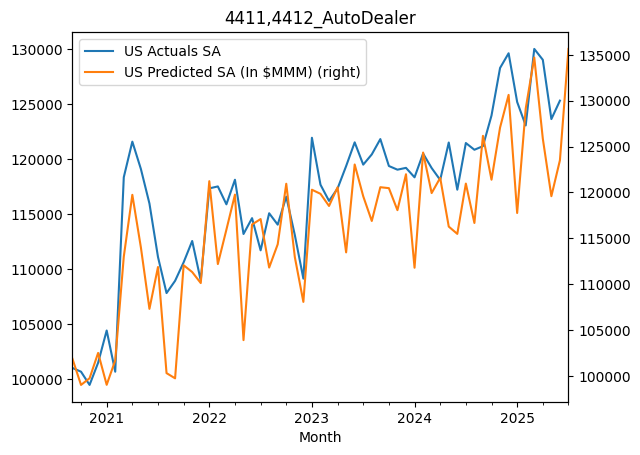

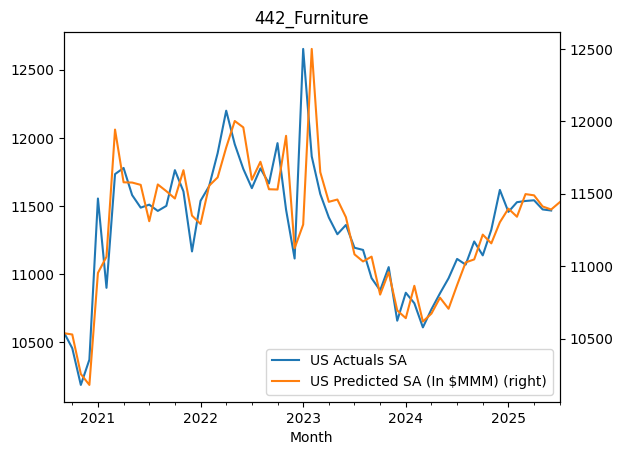

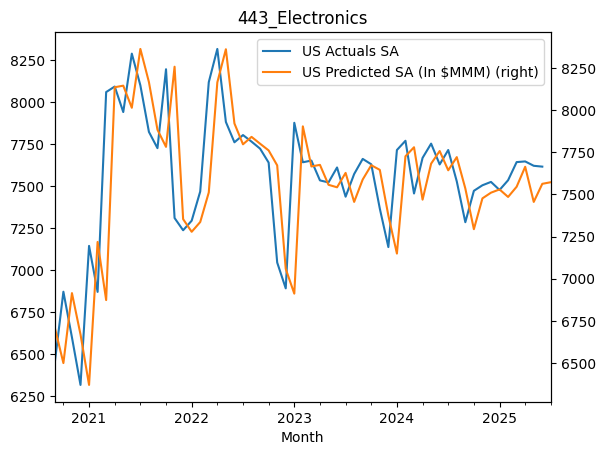

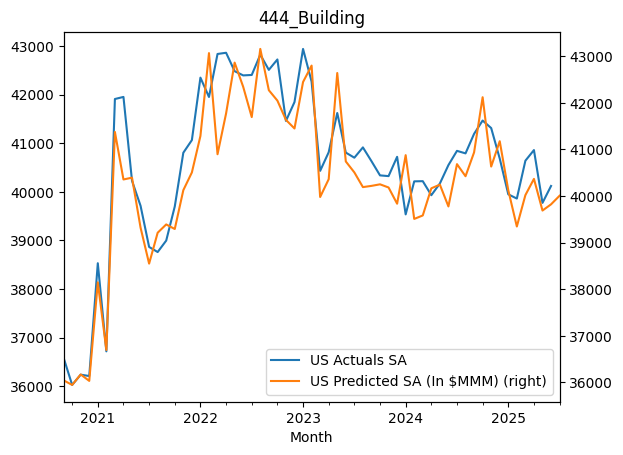

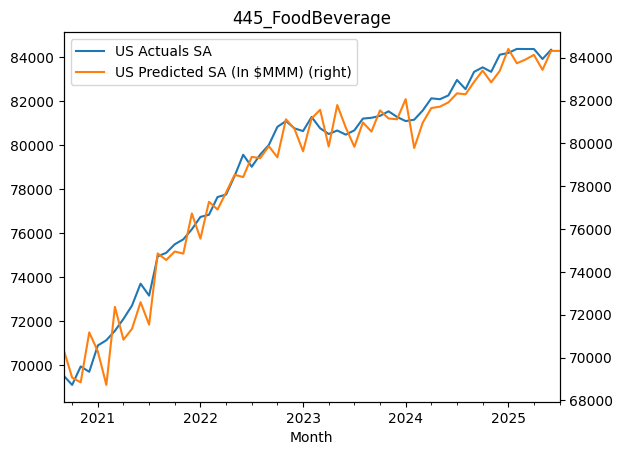

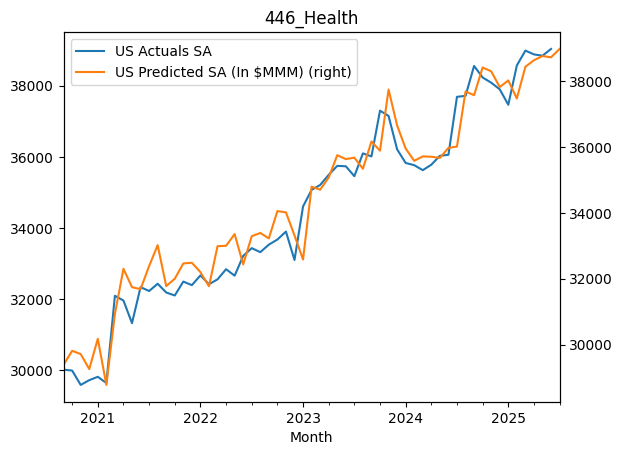

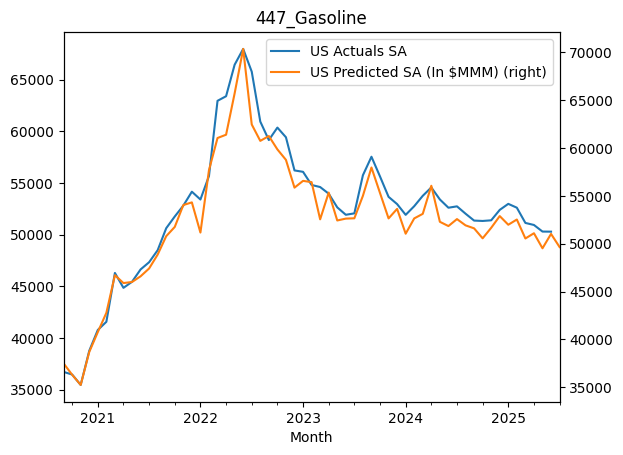

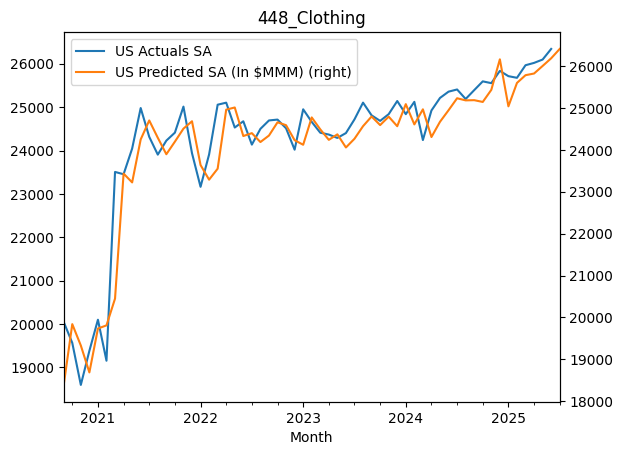

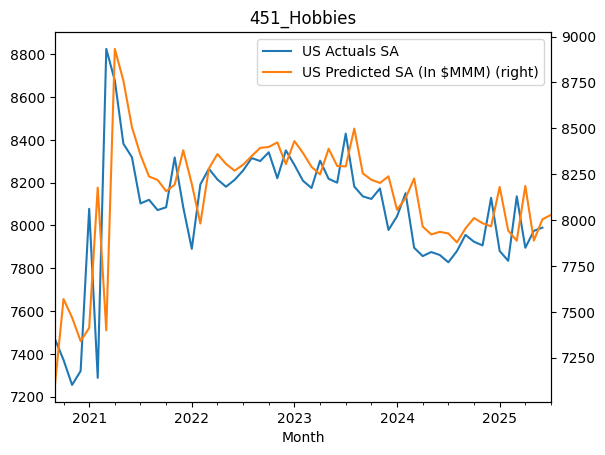

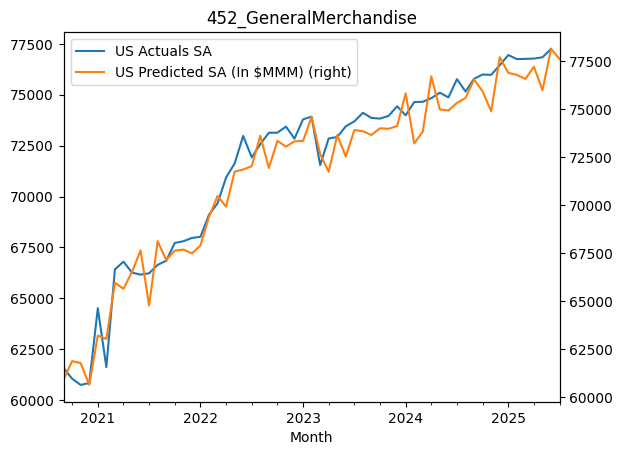

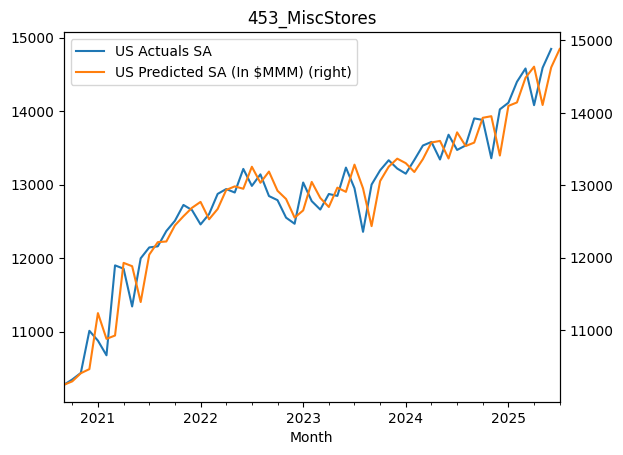

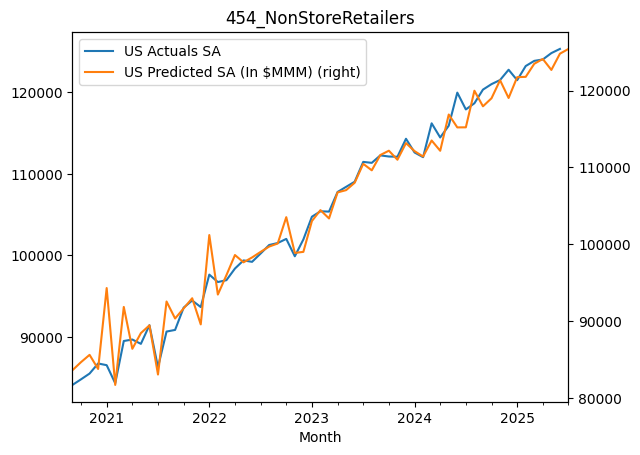

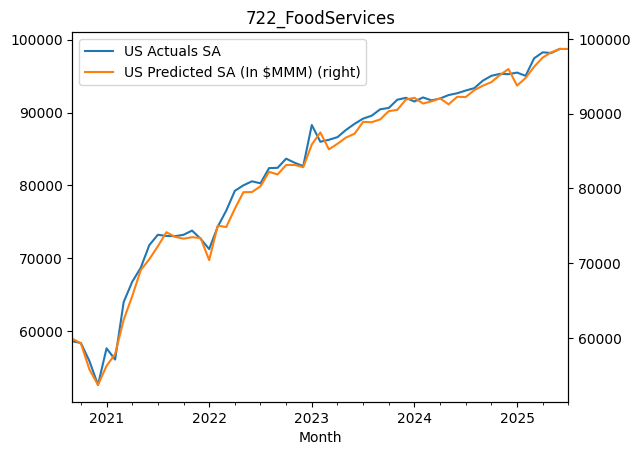

In [9]:
for sheet_name, df in all_sheets.items():
    if all(key in df for key in ["US Actuals SA", "US Predicted SA (In $MMM)"]):
        df = df[63:]
        ax = df.plot(x='Month', y='US Actuals SA', title=sheet_name)
        df.plot(x='Month', y='US Predicted SA (In $MMM)', secondary_y=True, ax=ax)

In [ ]:
df.colum

# Plot `Pred vs. Actual` - Single Plot

In [10]:
dfs = []
dfs_2 = []
for sheet_name, df in all_sheets.items():
    if all(key in df for key in ["US Actuals SA", "US Predicted SA (In $MMM)"]):
        cat = sheet_name.split('_')[1]
        df[cat + "_actual"] = df["US Actuals SA"]
        df[cat + "_predict"] = df["US Predicted SA (In $MMM)"]
        df[cat + "_x_mom"] = df["X Mom %"]
        df[cat + "_y_mom"] = df["Y MoM %"]
        df[cat + "_y_mom_pred"] = df["Y MoM % Predicted"]
        d = df[["Month", cat + "_actual", cat + "_predict"]]
        dd = df[["Month", cat + "_actual", cat + "_predict", cat + "_x_mom", cat + "_y_mom", cat + "_y_mom_pred"]]
        dfs.append(d[63:])
        dfs_2.append(dd)


In [11]:
print(len(dfs), len(dfs_2))

13 13


In [12]:
dfs[0][0::2].head()

Loading ITables v2.4.4 from the internet... (need help?)


In [13]:
dfs_2[0][0::2].head()

Loading ITables v2.4.4 from the internet... (need help?)


In [14]:
from functools import reduce

# -- just actual and predict
df_all = reduce(lambda left, right: pd.merge(left, right, on='Month'), dfs)
df_all.set_index('Month', inplace=True)
print(df_all.head(1))

# -- everything...
df_full = reduce(lambda left, right: pd.merge(left, right, on='Month'), dfs_2)
df_full.set_index('Month', inplace=True)
print(df_full.head(1))

            AutoDealer_actual  AutoDealer_predict  Furniture_actual  \
Month                                                                 
2020-09-01           101005.0       101855.327052           10576.0   

            Furniture_predict  Electronics_actual  Electronics_predict  \
Month                                                                    
2020-09-01       10536.952462              6451.0          6708.605152   

            Building_actual  Building_predict  FoodBeverage_actual  \
Month                                                                
2020-09-01          36584.0      36045.765595              69533.0   

            FoodBeverage_predict  ...  Hobbies_actual  Hobbies_predict  \
Month                             ...                                    
2020-09-01          70380.757275  ...          7469.0      7101.759105   

            GeneralMerchandise_actual  GeneralMerchandise_predict  \
Month                                                       

In [15]:
df_full.head()

Loading ITables v2.4.4 from the internet... (need help?)


In [16]:
for y1, y2 in zip(df_all.columns[0::2], df_all.columns[1::2]):
    print(y1, y2)

AutoDealer_actual AutoDealer_predict
Furniture_actual Furniture_predict
Electronics_actual Electronics_predict
Building_actual Building_predict
FoodBeverage_actual FoodBeverage_predict
Health_actual Health_predict
Gasoline_actual Gasoline_predict
Clothing_actual Clothing_predict
Hobbies_actual Hobbies_predict
GeneralMerchandise_actual GeneralMerchandise_predict
MiscStores_actual MiscStores_predict
NonStoreRetailers_actual NonStoreRetailers_predict
FoodServices_actual FoodServices_predict


In [19]:
for yx in df_all.columns[1::2]:
    print(yx, df_full[yx][-1])

AutoDealer_predict 135649.82580493516
Furniture_predict 11441.762873381529
Electronics_predict 7572.591031551237
Building_predict 40007.33381864086
FoodBeverage_predict 84320.67452258432
Health_predict 38986.95811609172
Gasoline_predict 49648.125387154534
Clothing_predict 26407.800270245985
Hobbies_predict 8028.583833870919
GeneralMerchandise_predict 77619.68704533984
MiscStores_predict 14881.617371464685
NonStoreRetailers_predict 125406.26320863464
FoodServices_predict 98665.7056013255


In [20]:
bank_estimate = sum([df_all[yx][-1] for yx in df_all.columns[1::2]])
print(bank_estimate)

718636.9288852209


np.float64(135649.82580493516)

In [181]:
print(bank_estimate*100.0)

7.244180974797993


In [1]:
df_full.columns

NameError: name 'df_full' is not defined

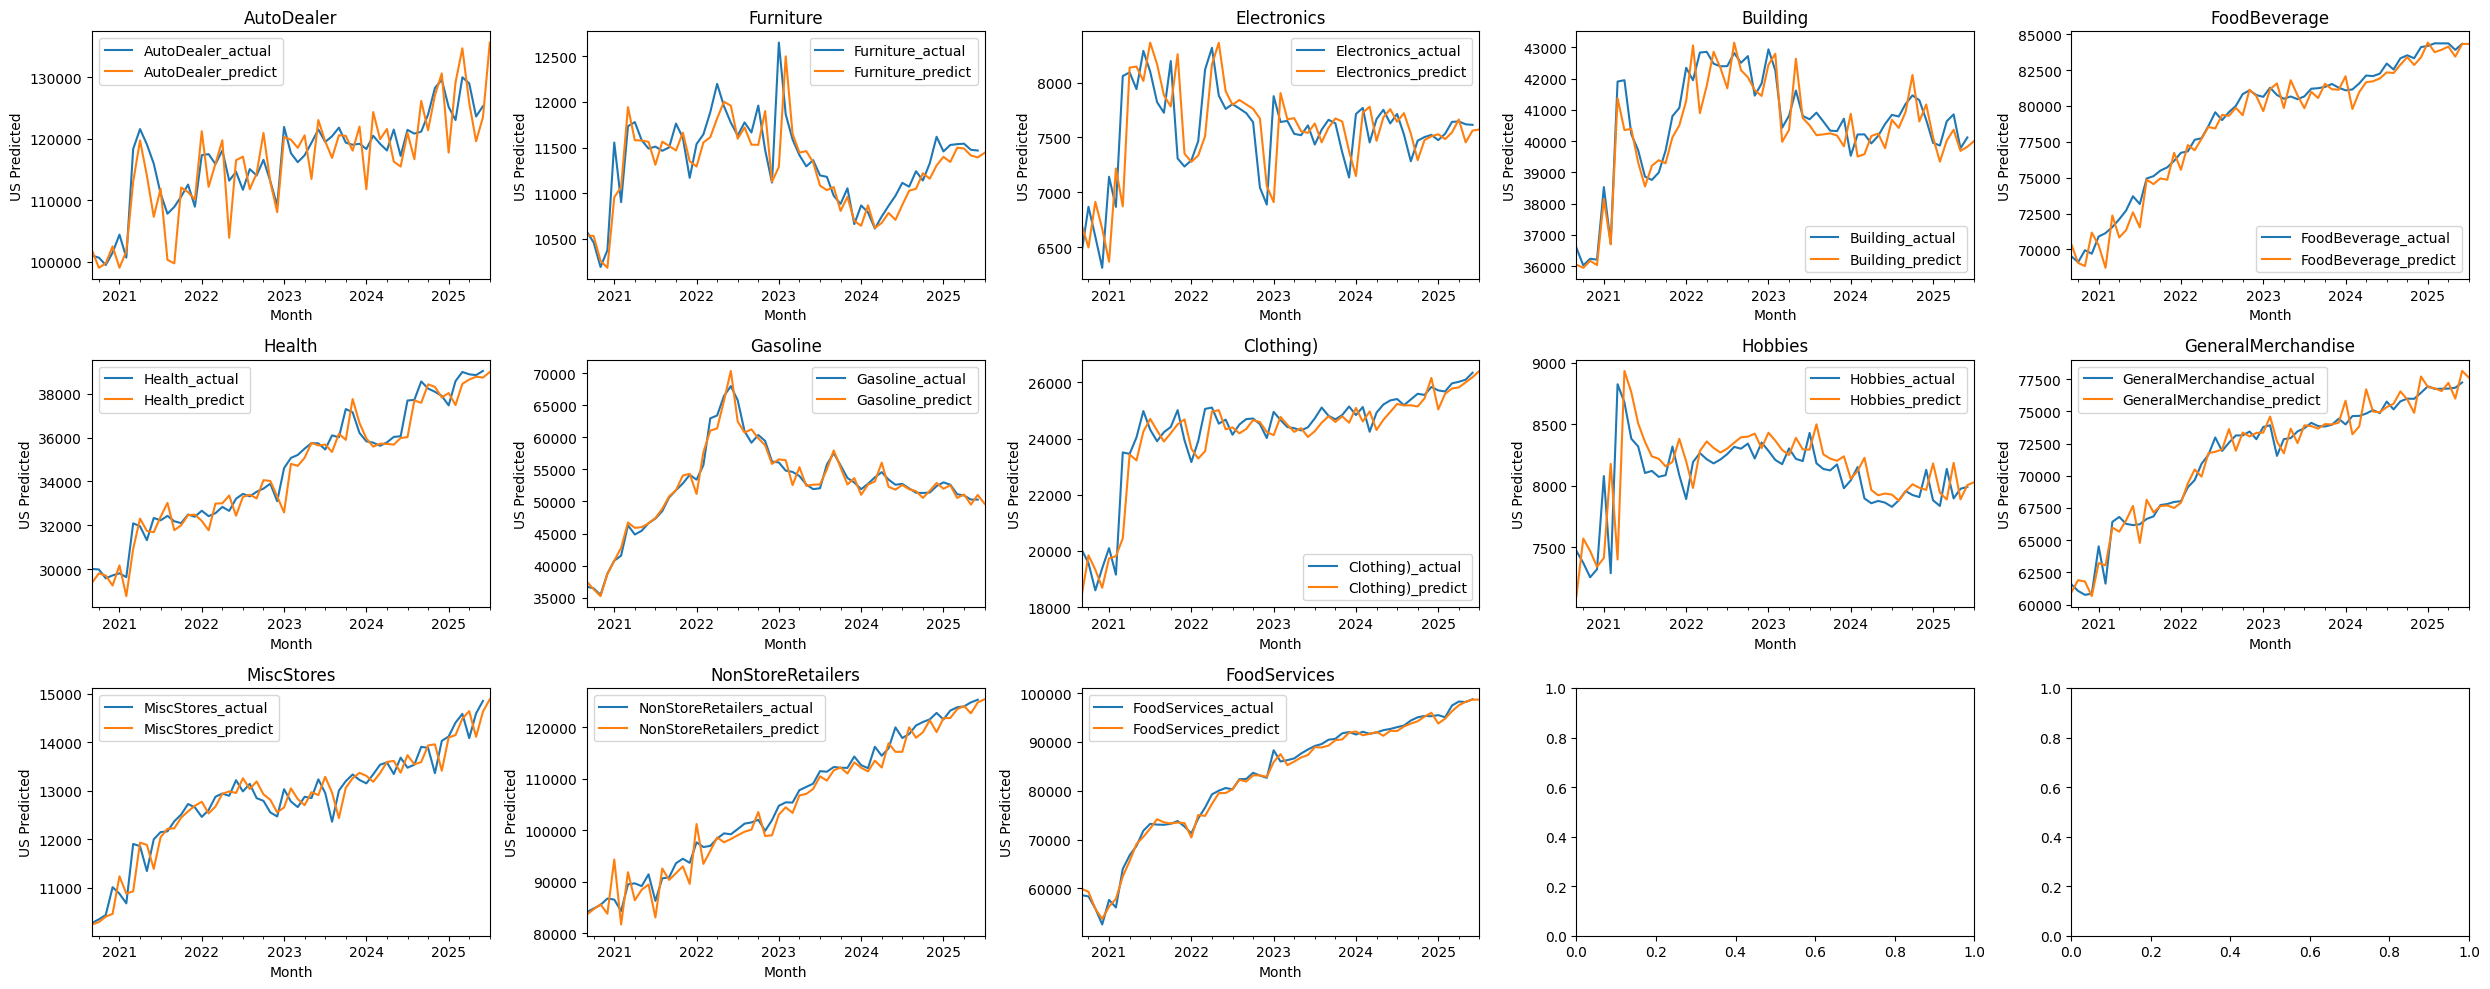

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))

i = 0
j = 0
for y1, y2 in zip(df_all.columns[0::2], df_all.columns[1::2]):
    title = y1.split("_")[0]
    ax[i,j].set_title(title)
    a = ax[i,j]

    ax[i,j].set_ylabel("US Actual")
    df_all.plot(y=y1, ylabel="US Actual", ax=ax[i,j])
    df_all.plot(y=y2, ylabel="US Predicted", ax=ax[i,j])

    j += 1
    if j == 5:
        j = 0
        i += 1
fig.tight_layout()
plt.show()

In [108]:
df_all

Loading ITables v2.4.4 from the internet... (need help?)


In [111]:
all_sheets.keys()

dict_keys(['Summary', '441_Motor Vehicles', '4411,4412_AutoDealer', '4411,4412_AutoNonDealer', '442_Furniture', '443_Electronics', '444_Building', '445_FoodBeverage', '446_Health', '447_Gasoline', '448_Clothing)', '451_Hobbies', '452_GeneralMerchandise', '453_MiscStores', '454_NonStoreRetailers', '722_FoodServices'])

In [30]:
df_all.columns

Index(['AutoDealer_actual', 'AutoDealer_predict', 'Furniture_actual',
       'Furniture_predict', 'Electronics_actual', 'Electronics_predict',
       'Building_actual', 'Building_predict', 'FoodBeverage_actual',
       'FoodBeverage_predict', 'Health_actual', 'Health_predict',
       'Gasoline_actual', 'Gasoline_predict', 'Clothing_actual',
       'Clothing_predict', 'Hobbies_actual', 'Hobbies_predict',
       'GeneralMerchandise_actual', 'GeneralMerchandise_predict',
       'MiscStores_actual', 'MiscStores_predict', 'NonStoreRetailers_actual',
       'NonStoreRetailers_predict', 'FoodServices_actual',
       'FoodServices_predict'],
      dtype='object')

In [29]:
df_all

'AutoDealer_predict'

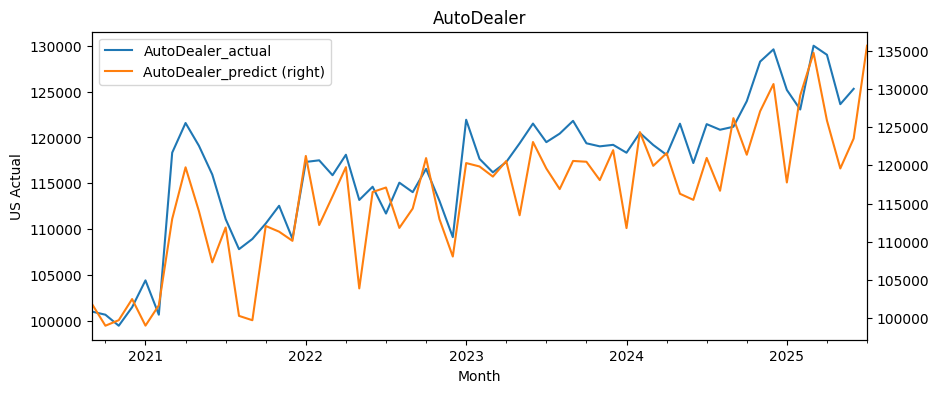

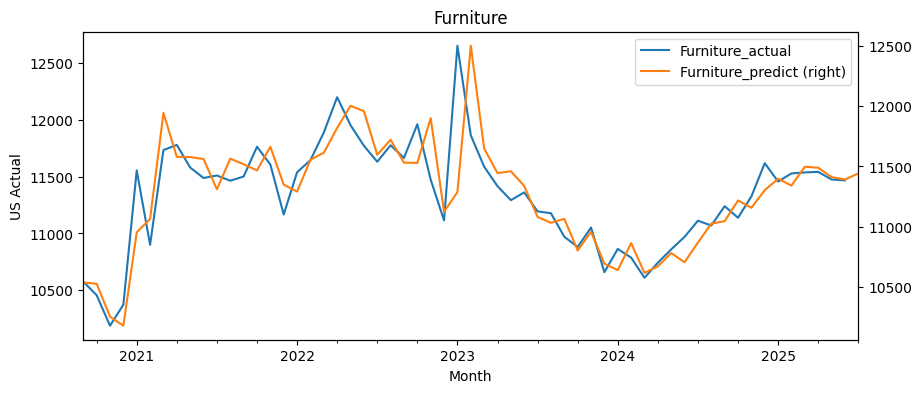

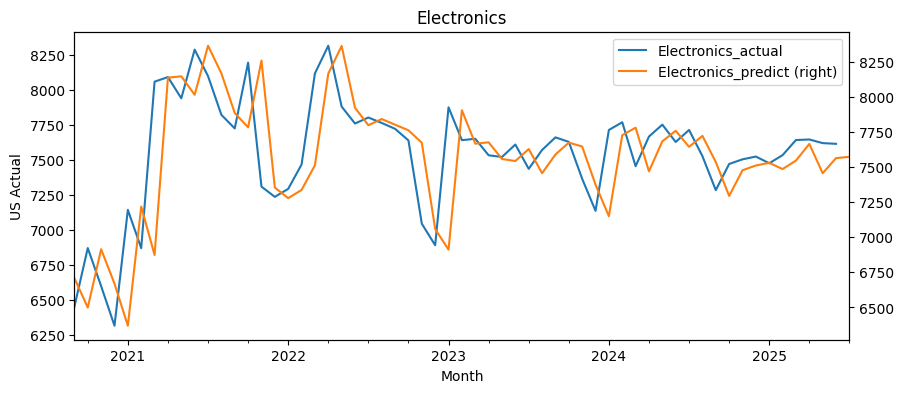

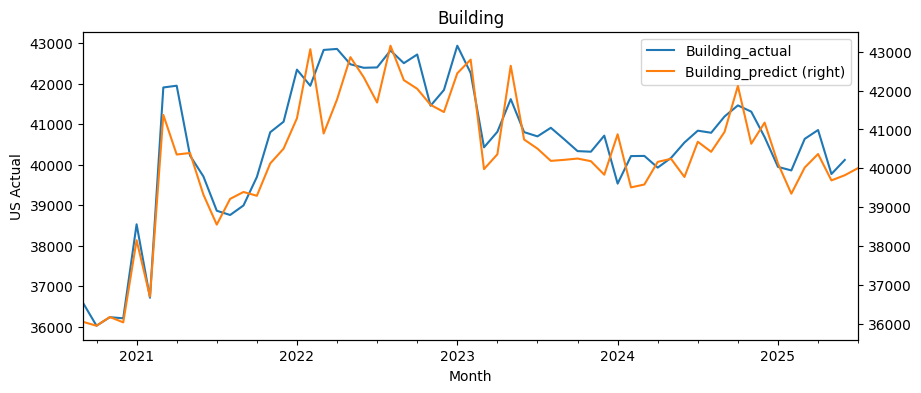

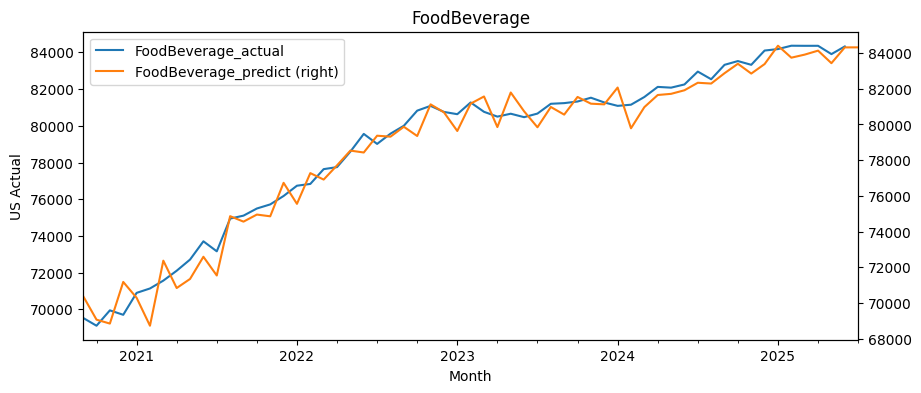

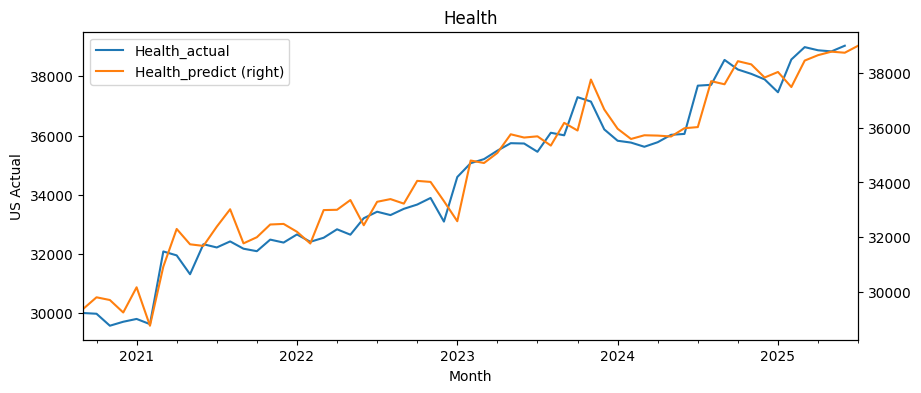

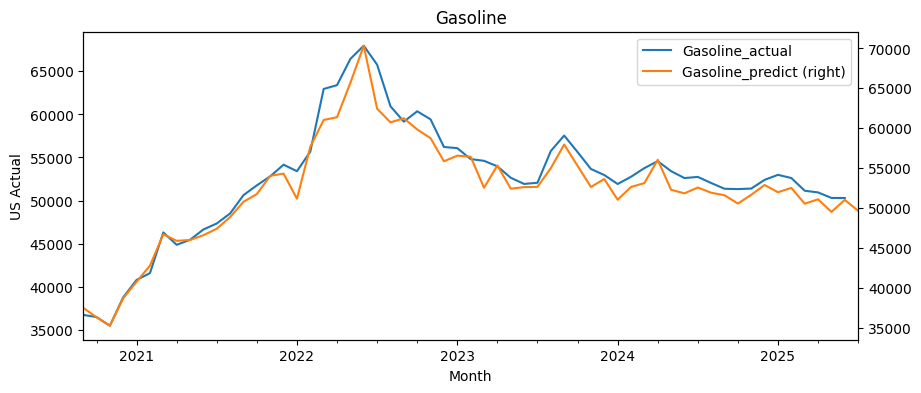

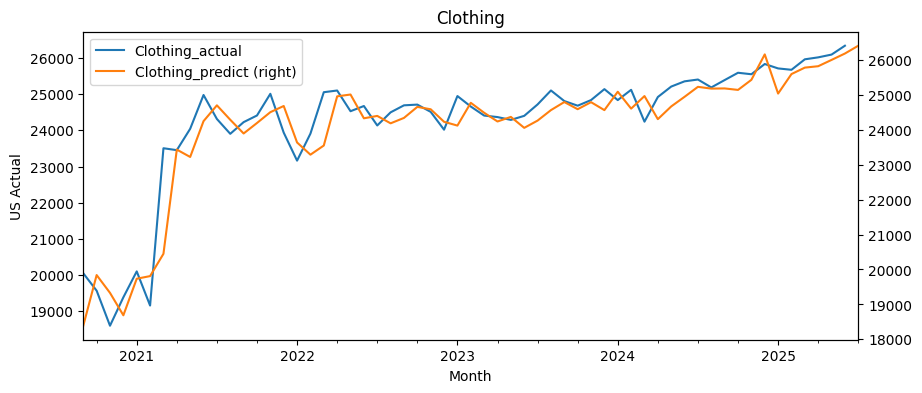

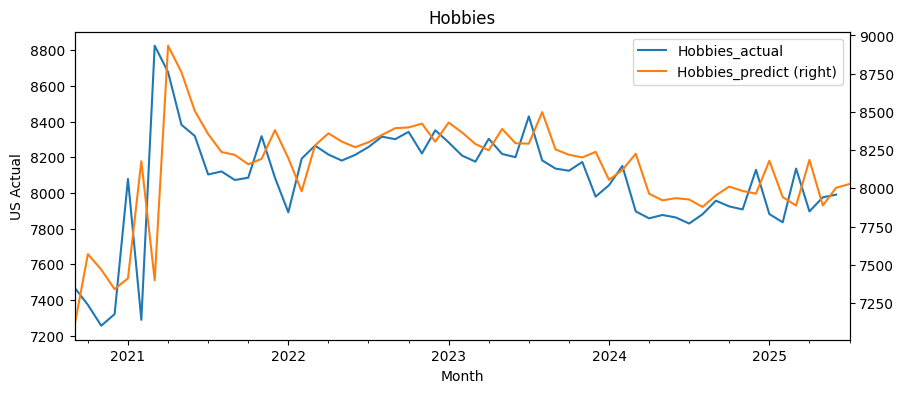

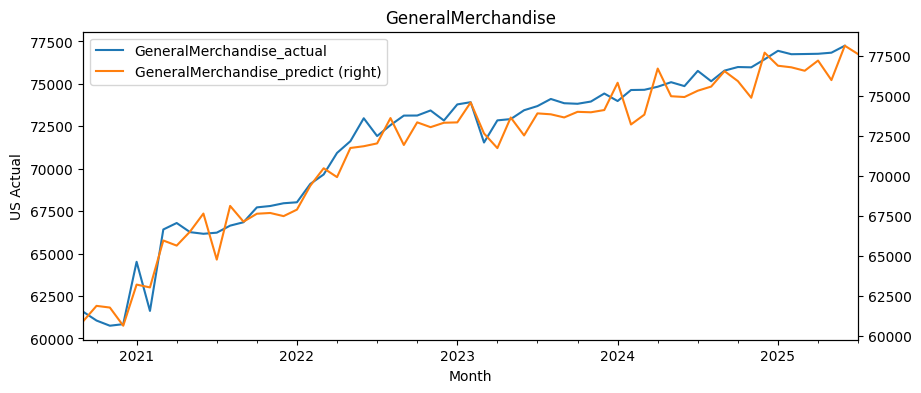

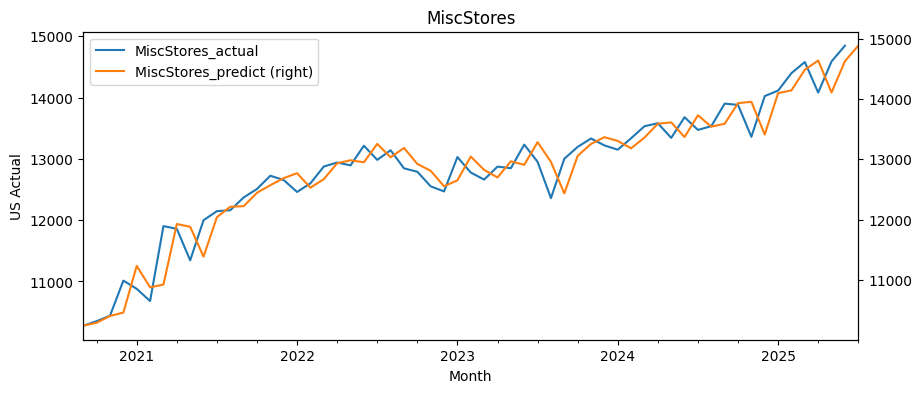

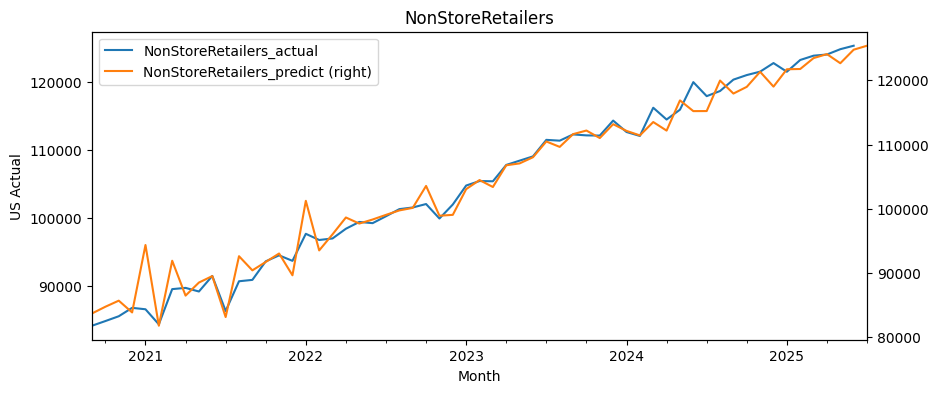

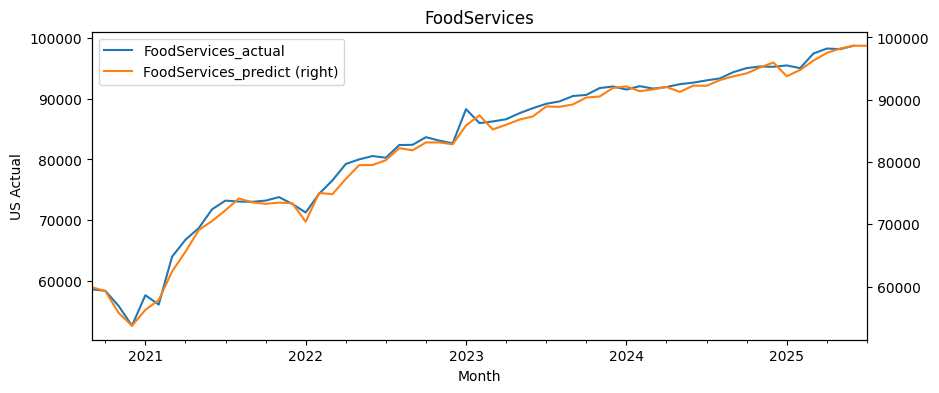

In [35]:
for y1, y2 in zip(df_all.columns[0::2], df_all.columns[1::2]):
    title = y1.split("_")[0]
    ax = df_all.plot(y=y1, title=title, figsize=(10, 4))
    ax.set_ylabel("US Actual")
    df_all.plot(y=y2, secondary_y=True, ax=ax)
    print()